In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/power_consumption/household_power_consumption.txt',sep=';')

/var/folders/29/2_xxbt5d1gn7b5yqm290y2hh0000gn/T/ipykernel_43717/692695353.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/alenjose/Desktop/data/power_consumption/household_power_consumption.txt',sep=';')


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.Global_active_power.value_counts().head(1)

?    25979
Name: Global_active_power, dtype: int64

In [8]:
df[['Global_active_power','Global_reactive_power','Voltage',
    'Global_intensity','Sub_metering_1','Sub_metering_2']] = df[['Global_active_power','Global_reactive_power','Voltage',
    'Global_intensity','Sub_metering_1','Sub_metering_2']].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
def null_rows(df, exclude=None):
    exclude = [] if exclude is None else exclude
    return df[df[df.columns.difference(exclude)].isna().all(1)]


In [12]:
len(null_rows(df, ['Date','Time']))

25979

In [13]:
index_list = df[df[['Global_active_power','Global_reactive_power','Voltage',
                    'Global_intensity','Sub_metering_1','Sub_metering_2']].isnull().all(axis=1)].index

In [14]:
# remove rows where all the columns have null value (not useful for the analysis)
df = df.drop(index_list)

In [16]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [18]:
print(type(df.Date[0]))
df.Date[0]

<class 'str'>


'16/12/2006'

In [19]:
from datetime import datetime
datetime.strptime(df.Date[0], '%d/%m/%Y')

datetime.datetime(2006, 12, 16, 0, 0)

In [20]:
df.Date = df.Date.apply(lambda x:datetime.strptime(x, '%d/%m/%Y'))

What are the patterns of energy consumption during different times of the day, week, and year?

In [25]:
(df['Date'].max() - df['Date'].min())

Timedelta('1441 days 00:00:00')

In [27]:
df['month'] = df['Date'].dt.month

In [34]:
weekday_dict = {1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat",7:"Sun"}

In [36]:
df['dayOfWeek'] = df['Date'].apply(lambda x:x.isoweekday()).map(weekday_dict)

In [48]:
df['hourOfDay'] = df['Time'].str.split(':').str[0].astype(int)

In [52]:
df = df[['Date', 'Time', 'month', 'dayOfWeek', 'hourOfDay', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

df.head(2)

,Date,Time,month,dayOfWeek,hourOfDay,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,12,Sat,17,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,12,Sat,17,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [56]:
mnth_grp = df.groupby('month')['Global_active_power'].mean()* 1000 / 60

In [104]:
mnth_grp

month
1     24.370425
2     21.673845
3     20.522376
4     17.452428
5     17.159514
6     15.152465
7     11.672649
8      9.546873
9     16.260875
10    18.952355
11    21.525536
12    24.828815
Name: Global_active_power, dtype: float64

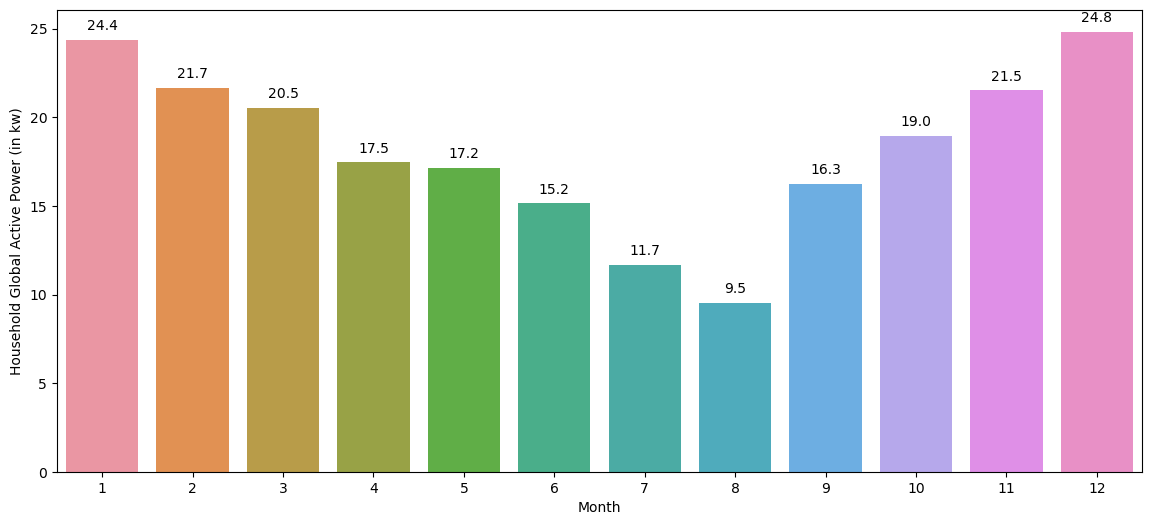

In [64]:
fig, ax = plt.subplots(figsize=(14,6))

barplot = sns.barplot(x=mnth_grp.index, y=mnth_grp.values, ax=ax)

plt.xlabel("Month")
plt.ylabel('Household Global Active Power (in kw)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.show()

    January (1) and December (12) have the highest power consumption levels, with 24.37 kW and 24.83 kW respectively. This could be due to increased heating needs during the winter months, or increased lighting usage due to shorter daylight hours (assuming this data comes from a region in the temperate zone with cold winters).

    February (2) and November (11) also have high consumption levels, around 21.67 kW and 21.53 kW respectively, which follows the trend of higher consumption in colder months.

    Consumption starts to decrease in March (3), with an average power usage of 20.52 kW, and continues to decline through the spring and summer months, reaching the lowest point in August (8) with an average consumption of 9.55 kW. This pattern could be due to warmer weather leading to reduced heating needs.

    Starting from September (9), consumption starts to climb again, reaching 16.26 kW in September, 18.95 kW in October (10), and continuing to rise in the winter months.

For shareholders, this information is crucial as it gives a clear picture of the power demand cycle over the year. It can help in strategic planning for power generation and distribution, infrastructure maintenance schedules, and managing peak load times. It can also provide insights for developing pricing strategies or demand-side management programs, such as incentivizing customers to shift their usage away from peak times.


In [92]:
dayOfWeek_grp = (df.groupby('dayOfWeek')['Global_active_power'].mean()* 1000 / 60).reset_index()

In [93]:
dayOfWeek_grp

,dayOfWeek,Global_active_power
0,Fri,17.389900
1,Mon,16.659101
2,Sat,20.805586
3,Sun,20.336464
4,Thur,16.363488
5,Tue,17.829925
6,Wed,18.043129


In [94]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
dayOfWeek_grp['dayOfWeek'] = pd.Categorical(dayOfWeek_grp['dayOfWeek'], categories=days, ordered=True)
dayOfWeek_grp = dayOfWeek_grp.sort_values('dayOfWeek')

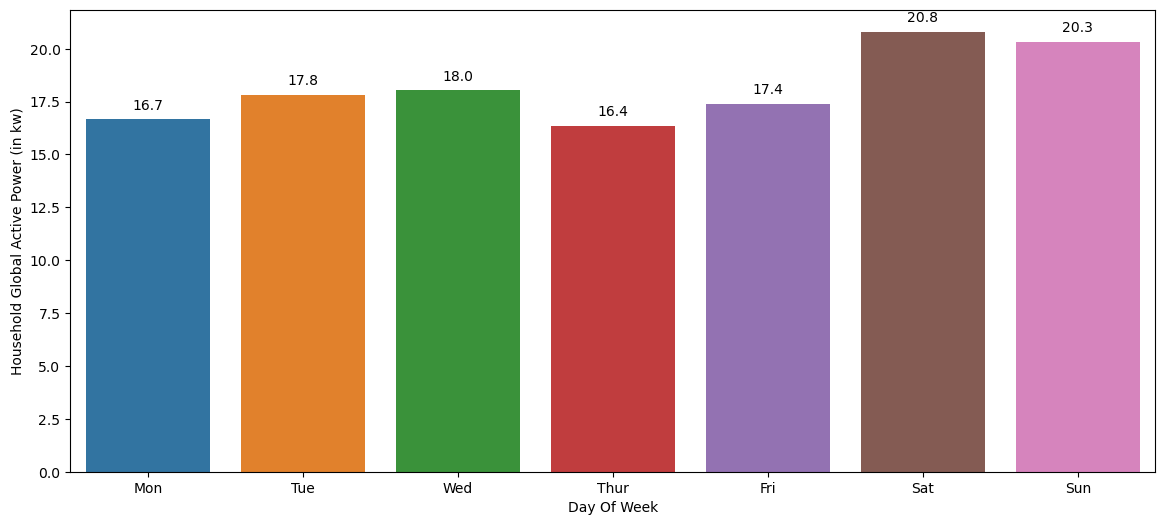

In [95]:
fig, ax = plt.subplots(figsize=(14,6))

barplot = sns.barplot(x=dayOfWeek_grp['dayOfWeek'], y=dayOfWeek_grp['Global_active_power'], ax=ax)

plt.xlabel("Day Of Week")
plt.ylabel('Household Global Active Power (in kw)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.show()

This dataset provides a weekly breakdown of the average global active power consumption. Each row corresponds to a day of the week, and the Global_active_power column provides the average power consumption for that particular day.

Here is a summary of the patterns:

    Monday and Thursday have the lowest average power consumption levels, roughly around 16.66 kW and 16.36 kW respectively. This might be due to lower activity levels after the weekend or specific business operations on these days.

    Tuesday sees a significant increase in consumption to approximately 17.83 kW, which continues into Wednesday with an average consumption of 18.04 kW.

    Friday's consumption increases further, reaching 17.39 kW, indicating that power usage may be ramping up for the weekend.

    The weekend days, Saturday and Sunday, have the highest average consumption levels, around 20.81 kW and 20.34 kW respectively. This could suggest that more power-consuming activities take place during the weekend, possibly due to people being home more often or businesses operating for extended hours.

For shareholders, this pattern provides key insights into how power consumption varies during the week. Understanding these trends can help in making informed decisions about energy management, infrastructure investment, and pricing strategies.

However, it's important to consider the context and the specific characteristics of the user base when interpreting these trends. For instance, these patterns might look different if we're dealing with residential customers versus industrial or commercial users. In-depth analysis of this data can also help the company identify opportunities for energy-saving initiatives or strategies to smooth out the peaks in demand.

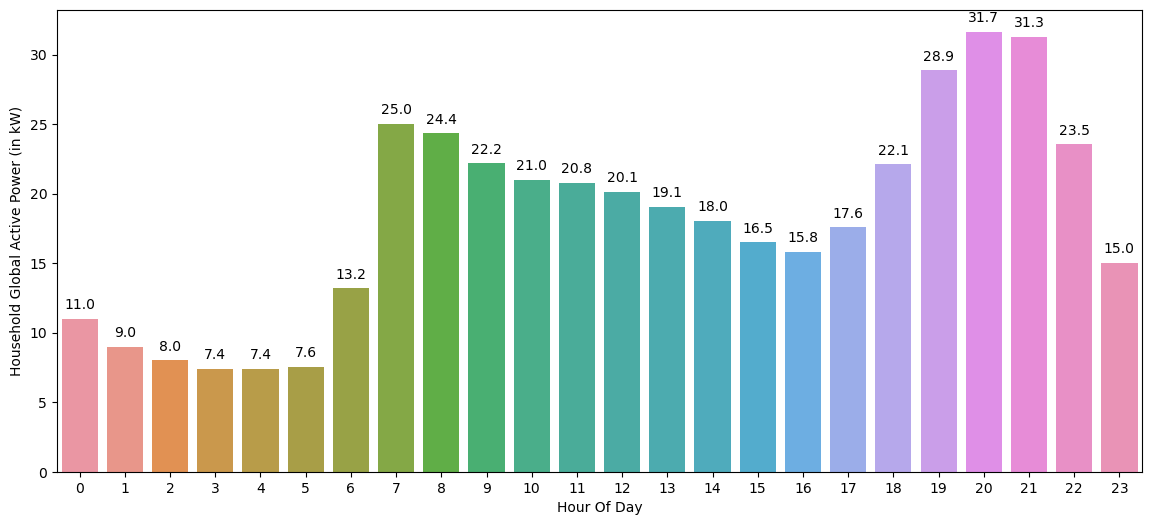

In [102]:
hourOfDay_grp = (df.groupby('hourOfDay')['Global_active_power'].mean()* 1000 / 60).reset_index()

fig, ax = plt.subplots(figsize=(14,6))

barplot = sns.barplot(x=hourOfDay_grp['hourOfDay'], y=hourOfDay_grp['Global_active_power'], ax=ax)

plt.xlabel("Hour Of Day")
plt.ylabel('Household Global Active Power (in kW)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.show()

Observing the dataset, it appears that power consumption is lowest in the early morning hours (from 1 AM to 6 AM) and highest in the evening (from 6 PM to 10 PM). This is a common pattern in residential energy usage as people tend to use more electrical appliances during the evening.

<AxesSubplot:xlabel='Date'>

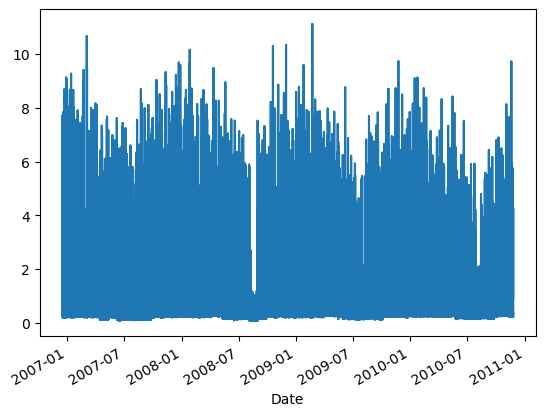

In [113]:
df.set_index('Date')['Global_active_power'].plot(kind='line')

### The line plot is densely populated, it might be because the data is too granular, making it hard to attain any patterns. 

### Resampling : changing from hourly data to daily, weekly, or monthly averages.

**Daily :** 

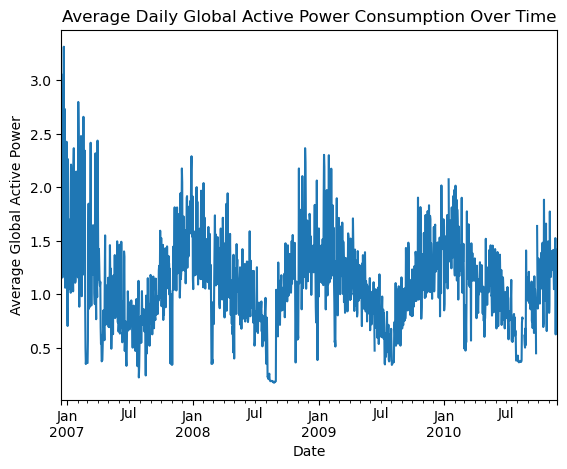

In [120]:
df.set_index('Date')['Global_active_power'].resample('D').mean().plot(kind='line')
plt.title('Average Daily Global Active Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Average Global Active Power')
plt.show()
